In [51]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils
%matplotlib inline

In [2]:
directory = 'inputs'
utils.create_imgs_directory()
utils.create_results_directory()

In [3]:
# utils.get_results(directory)

In [3]:
results = pd.read_json(os.path.join('..','results','result.json')).T

In [4]:
results = results[['Crescente','Decrescente','Eficiente','GRASP','Exato']]

In [5]:
results

,Crescente,Decrescente,Eficiente,GRASP,Exato
input1.in,14578,22911,29636,31621,31621
input2.in,19957,9893,64939,67829,67829
input3.in,38379,19893,143449,143449,143449
input4.in,21347,23630,28840,28840,28840
input5.in,5335,10844,15785,15785,15785
input6.in,6,63881,99861,99861,99861
input7.in,505,1148,1894,1922,1940
input8.in,714,510,714,720,741
input9.in,9717,9994,9717,9755,10281
input10.in,17523,19994,17523,19246,20149


## **Estilos**

https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

In [53]:
plt.rcParams['figure.figsize'] = (10, 7) #(width,height)
plt.rcParams['axes.grid'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['savefig.transparent'] = True

In [11]:
# plt.style.use('seaborn')
# plt.style.use('bmh')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')

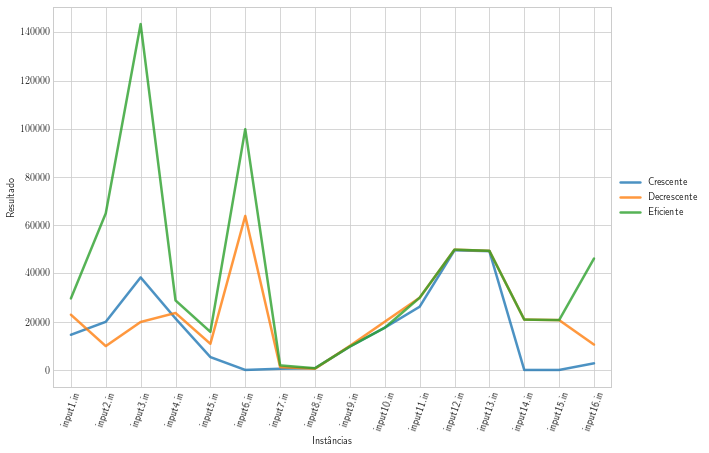

In [118]:
results[["Crescente", "Decrescente", "Eficiente"]].plot(lw=2.5, alpha=0.8, ls="-")
plt.style.use('seaborn-whitegrid')
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultado')
plt.savefig(os.path.join('..','imgs/')+'greedy_compare.pdf', bbox_inches='tight', transparent=True)

# **GRASP**

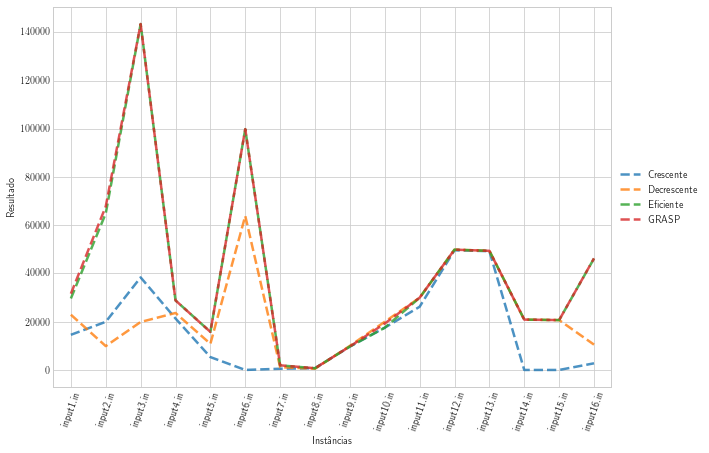

In [117]:
results[["Crescente", "Decrescente", "Eficiente", "GRASP"]].plot(lw=2.5, alpha=0.8, ls="--", marker="")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultado')
plt.savefig(os.path.join('..','imgs/')+'heuristics_compare.pdf', bbox_inches='tight', transparent=True)

In [123]:
print(results[["Crescente", "Decrescente", "Eficiente", "GRASP"]].to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Crescente &  Decrescente &  Eficiente &   GRASP \\
\midrule
input1.in  &      14578 &        22911 &      29636 &   31621 \\
input2.in  &      19957 &         9893 &      64939 &   67829 \\
input3.in  &      38379 &        19893 &     143449 &  143449 \\
input4.in  &      21347 &        23630 &      28840 &   28840 \\
input5.in  &       5335 &        10844 &      15785 &   15785 \\
input6.in  &          6 &        63881 &      99861 &   99861 \\
input7.in  &        505 &         1148 &       1894 &    1922 \\
input8.in  &        714 &          510 &        714 &     720 \\
input9.in  &       9717 &         9994 &       9717 &    9755 \\
input10.in &      17523 &        19994 &      17523 &   19246 \\
input11.in &      26212 &        29943 &      29943 &   29965 \\
input12.in &      49622 &        49884 &      49884 &   49885 \\
input13.in &      49262 &        49395 &      49395 &   49395 \\
input14.in &          0 &        20880 &      20880 &   2

## **Adicionando os resultados exatos**

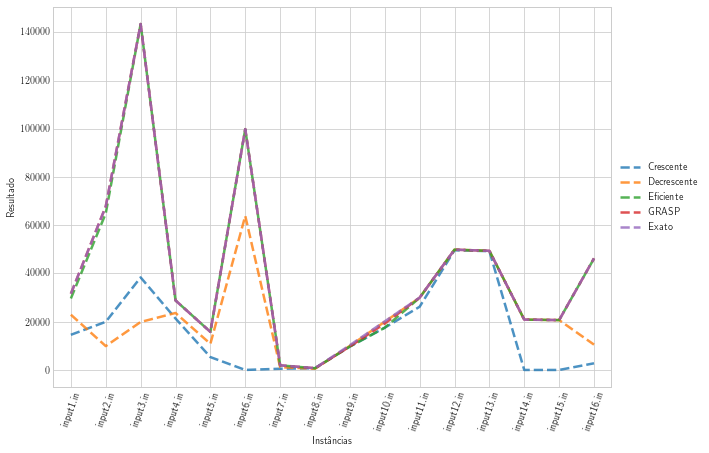

In [119]:
results[["Crescente", "Decrescente", "Eficiente", "GRASP", "Exato"]].plot(lw=2.5, alpha=0.8, ls="--")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultado')
plt.savefig(os.path.join('..','imgs/')+'exact_compare.pdf', bbox_inches='tight', transparent=True)

In [49]:
results.corr()

,Crescente,Decrescente,Eficiente,GRASP,Exato
Crescente,1.000000,0.477150,0.420730,0.421331,0.421828
Decrescente,0.477150,1.000000,0.467511,0.462745,0.462560
Eficiente,0.420730,0.467511,1.000000,0.999708,0.999640
GRASP,0.421331,0.462745,0.999708,1.000000,0.999979
Exato,0.421828,0.462560,0.999640,0.999979,1.000000


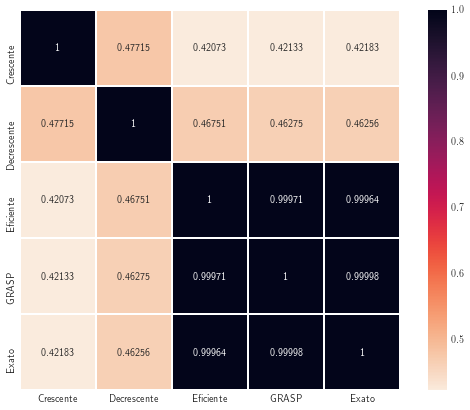

In [120]:
sns.heatmap(results.corr(), cmap = sns.cm.rocket_r ,square=True, lw=1, robust=False, annot=True, fmt='.5g', )
plt.savefig(os.path.join('..','imgs/')+'heatmap.pdf', bbox_inches='tight')

# Cálculo do GAP

In [55]:
exact = results[["Exato"]]

In [56]:
exact

,Exato
input1.in,31621
input2.in,67829
input3.in,143449
input4.in,28840
input5.in,15785
input6.in,99861
input7.in,1940
input8.in,741
input9.in,10281
input10.in,20149


In [71]:
list(map(lambda x,y: ((y-x)/y)*100, results.values, exact.values))

[array([53.89772619, 27.54498593,  6.27747383,  0.        ,  0.        ]),
 array([70.57748161, 85.41479308,  4.26071444,  0.        ,  0.        ]),
 array([73.24554371, 86.13235366,  0.        ,  0.        ,  0.        ]),
 array([25.98127601, 18.06518724,  0.        ,  0.        ,  0.        ]),
 array([66.20209059, 31.30186886,  0.        ,  0.        ,  0.        ]),
 array([99.99399165, 36.03008181,  0.        ,  0.        ,  0.        ]),
 array([73.96907216, 40.82474227,  2.37113402,  0.92783505,  0.        ]),
 array([ 3.6437247 , 31.17408907,  3.6437247 ,  2.8340081 ,  0.        ]),
 array([5.48584768, 2.79155724, 5.48584768, 5.11623383, 0.        ]),
 array([13.03290486,  0.76926895, 13.03290486,  4.48161199,  0.        ]),
 array([12.62957901,  0.19332689,  0.19332689,  0.119996  ,  0.        ]),
 array([0.52721259, 0.00200461, 0.00200461, 0.        , 0.        ]),
 array([0.27531479, 0.00607312, 0.00607312, 0.00607312, 0.        ]),
 array([100.,   0.,   0.,   0.,   0.]),


In [72]:
gap = pd.DataFrame(list(map(lambda x,y: ((y-x)/y)*100, results.values, exact.values)), columns=results.columns, index=results.index)

In [73]:
gap

,Crescente,Decrescente,Eficiente,GRASP,Exato
input1.in,53.897726,27.544986,6.277474,0.000000,0.0
input2.in,70.577482,85.414793,4.260714,0.000000,0.0
input3.in,73.245544,86.132354,0.000000,0.000000,0.0
input4.in,25.981276,18.065187,0.000000,0.000000,0.0
input5.in,66.202091,31.301869,0.000000,0.000000,0.0
input6.in,99.993992,36.030082,0.000000,0.000000,0.0
input7.in,73.969072,40.824742,2.371134,0.927835,0.0
input8.in,3.643725,31.174089,3.643725,2.834008,0.0
input9.in,5.485848,2.791557,5.485848,5.116234,0.0
input10.in,13.032905,0.769269,13.032905,4.481612,0.0


In [74]:
gap.mean()

Crescente      49.594312
Decrescente    27.347272
Eficiente       2.213083
GRASP           0.842860
Exato           0.000000
dtype: float64

In [75]:
gap.std()

Crescente      39.701770
Decrescente    31.341851
Eficiente       3.634122
GRASP           1.708820
Exato           0.000000
dtype: float64

# **TEMPO DE EXECUÇÃO**

In [76]:
time = pd.read_json(os.path.join('..','results','time.json')).T

In [77]:
time = time[['Crescente','Decrescente','Eficiente','GRASP','Exato']]

In [78]:
print(time.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  Crescente &  Decrescente &  Eficiente &        GRASP &        Exato \\
\midrule
input1.in  &   0.000012 &     0.000008 &   0.000049 &     0.012054 &     0.299604 \\
input2.in  &   0.000018 &     0.000014 &   0.000045 &     0.035831 &     0.831294 \\
input3.in  &   0.000025 &     0.000017 &   0.000059 &     0.304420 &     2.007281 \\
input4.in  &   0.000026 &     0.000018 &   0.000049 &     0.082717 &     2.014614 \\
input5.in  &   0.000045 &     0.000034 &   0.000087 &     1.203739 &     1.989233 \\
input6.in  &   0.000077 &     0.000069 &   0.000148 &     5.439759 &    26.858557 \\
input7.in  &   0.000118 &     0.000106 &   0.000224 &     1.355621 &     0.598913 \\
input8.in  &   0.000154 &     0.000142 &   0.000289 &     3.156068 &     0.785180 \\
input9.in  &   0.000445 &     0.000385 &   0.000795 &     7.355839 &    10.908195 \\
input10.in &   0.000045 &     0.000034 &   0.000086 &     0.129530 &     4.878645 \\
input11.in &   0.000045 &     0

Text(0, 0.5, 'Tempo/s')

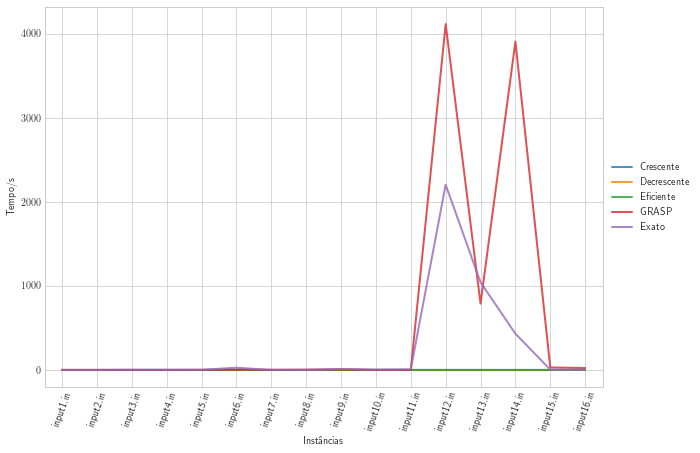

In [114]:
time.plot(lw=2, alpha=0.8, ls="-")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Tempo/s')
# plt.savefig(os.path.join('..','imgs/')+'greedy_compare.pdf', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'Tempo/s')

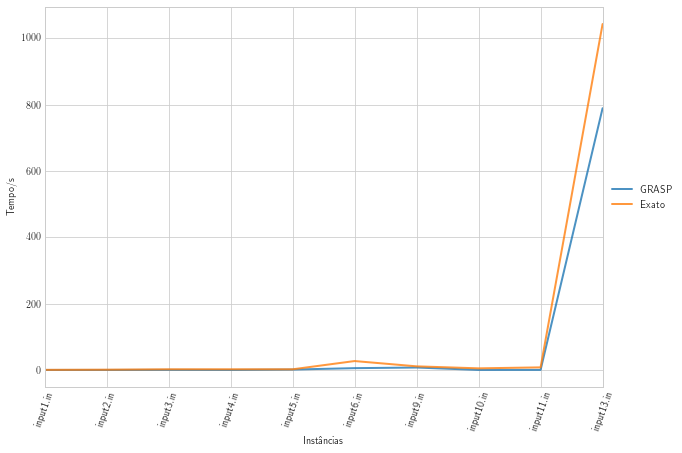

In [115]:
time[time["Exato"] > time["GRASP"]][["GRASP","Exato"]].plot(lw=2, alpha=0.8, ls="-")
plt.xticks(rotation=70)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Tempo/s')

Text(0, 0.5, 'Tempo/s')

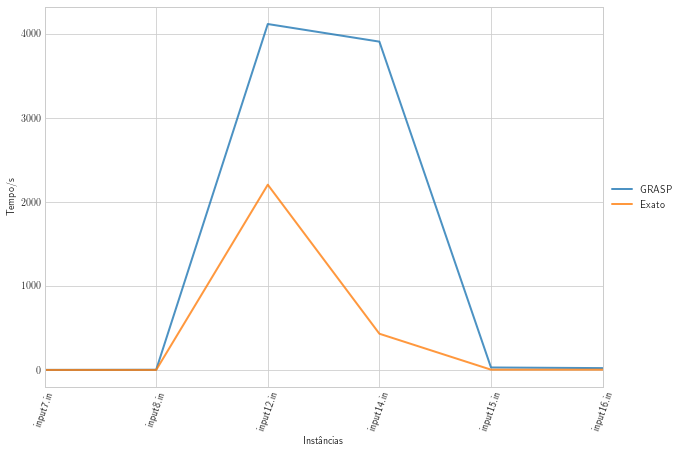

In [116]:
time[time["Exato"] < time["GRASP"]][["GRASP","Exato"]].plot(lw=2, alpha=0.8, ls="-")
plt.xticks(rotation=70)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Tempo/s')